### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [1]:
#1- A scraping script for getting 10 days weather forecasts of Benguerir city
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"
html = urlopen(url)
soup = BeautifulSoup(html)

In [3]:
# Getting days
container = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
days = container.find_all('h3')
get_day = []
get_days = []
for day in days:
    temp = day.find('span')
    if  temp != None:
        if temp.get_text() not in get_day:
            get_day.append(temp.get_text())
get_days=get_day[0:10]
get_days

['ven. 16',
 'sam. 17',
 'dim. 18',
 'lun. 19',
 'mar. 20',
 'mer. 21',
 'jeu. 22',
 'ven. 23',
 'sam. 24',
 'dim. 25']

In [4]:
summar = container.find_all('summary')
def get_day_info(summary):
    data = []
    for divs in summary.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            data.append(span.get_text())

        break
        
    return data

In [5]:
data = [get_day_info(summar[day]) for day in range(10)]
data

[['--', '/11°', '11°', 'Peu nuageux', '24%', 'OSO 10 km/h'],
 ['19°', '/8°', '8°', 'Plutôt ensoleillé', '15%', 'E 12 km/h'],
 ['22°', '/8°', '8°', 'Peu nuageux', '14%', 'ESE 11 km/h'],
 ['23°', '/8°', '8°', 'Plutôt ensoleillé', '7%', 'E 12 km/h'],
 ['23°', '/8°', '8°', 'Peu nuageux', '7%', 'SSO 16 km/h'],
 ['21°', '/7°', '7°', 'Ensoleillé', '7%', 'ENE 13 km/h'],
 ['21°', '/6°', '6°', 'Ensoleillé', '8%', 'ENE 12 km/h'],
 ['21°', '/7°', '7°', 'Ensoleillé', '7%', 'SSO 13 km/h'],
 ['21°', '/7°', '7°', 'Peu nuageux', '7%', 'SSO 14 km/h'],
 ['20°', '/7°', '7°', "Averses dans l'après-midi", '33%', 'SSO 19 km/h']]

In [6]:
#2- Let store the data sets into Pandas DataFrame.
import pandas as pd

In [7]:
data = [get_day_info(summar[day]) for day in range(10)]
data

[['--', '/11°', '11°', 'Peu nuageux', '24%', 'OSO 10 km/h'],
 ['19°', '/8°', '8°', 'Plutôt ensoleillé', '15%', 'E 12 km/h'],
 ['22°', '/8°', '8°', 'Peu nuageux', '14%', 'ESE 11 km/h'],
 ['23°', '/8°', '8°', 'Plutôt ensoleillé', '7%', 'E 12 km/h'],
 ['23°', '/8°', '8°', 'Peu nuageux', '7%', 'SSO 16 km/h'],
 ['21°', '/7°', '7°', 'Ensoleillé', '7%', 'ENE 13 km/h'],
 ['21°', '/6°', '6°', 'Ensoleillé', '8%', 'ENE 12 km/h'],
 ['21°', '/7°', '7°', 'Ensoleillé', '7%', 'SSO 13 km/h'],
 ['21°', '/7°', '7°', 'Peu nuageux', '7%', 'SSO 14 km/h'],
 ['20°', '/7°', '7°', "Averses dans l'après-midi", '33%', 'SSO 19 km/h']]

In [8]:
dataframe1 = pd.DataFrame(data=data)
dataframe1.drop(1, axis=1, inplace=True)
dataframe1 = pd.concat([pd.DataFrame(data=get_days), dataframe1], axis=1)
dataframe1

,0,0,2,3,4,5
0,ven. 16,--,11°,Peu nuageux,24%,OSO 10 km/h
1,sam. 17,19°,8°,Plutôt ensoleillé,15%,E 12 km/h
2,dim. 18,22°,8°,Peu nuageux,14%,ESE 11 km/h
3,lun. 19,23°,8°,Plutôt ensoleillé,7%,E 12 km/h
4,mar. 20,23°,8°,Peu nuageux,7%,SSO 16 km/h
5,mer. 21,21°,7°,Ensoleillé,7%,ENE 13 km/h
6,jeu. 22,21°,6°,Ensoleillé,8%,ENE 12 km/h
7,ven. 23,21°,7°,Ensoleillé,7%,SSO 13 km/h
8,sam. 24,21°,7°,Peu nuageux,7%,SSO 14 km/h
9,dim. 25,20°,7°,Averses dans l'après-midi,33%,SSO 19 km/h


In [9]:
columns = ['day', 'tempera_max', 'tempera_min', 'state', 
           'percentage_value', 'wind_speed']
dataframe1.columns = columns
dataframe1

,day,tempera_max,tempera_min,state,percentage_value,wind_speed
0,ven. 16,--,11°,Peu nuageux,24%,OSO 10 km/h
1,sam. 17,19°,8°,Plutôt ensoleillé,15%,E 12 km/h
2,dim. 18,22°,8°,Peu nuageux,14%,ESE 11 km/h
3,lun. 19,23°,8°,Plutôt ensoleillé,7%,E 12 km/h
4,mar. 20,23°,8°,Peu nuageux,7%,SSO 16 km/h
5,mer. 21,21°,7°,Ensoleillé,7%,ENE 13 km/h
6,jeu. 22,21°,6°,Ensoleillé,8%,ENE 12 km/h
7,ven. 23,21°,7°,Ensoleillé,7%,SSO 13 km/h
8,sam. 24,21°,7°,Peu nuageux,7%,SSO 14 km/h
9,dim. 25,20°,7°,Averses dans l'après-midi,33%,SSO 19 km/h


In [10]:
#1- A scraping script for getting 10 days weather forecasts of Tanjer city
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

url = "https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
html = urlopen(url)
soup = BeautifulSoup(html)
# Getting days
container = soup.find('div', id="WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
days = container.find_all('h3')
get_day = []
get_days = []
for day in days:
    temp = day.find('span')
    if  temp != None:
        if temp.get_text() not in get_day:
            get_day.append(temp.get_text())
get_days=get_day[0:10]

summar = container.find_all('summary')
def get_day_info(summary):
    data = []
    for divs in summary.find('div').find_all('div'):
        spans = divs.find_all('span')
        for span in spans:
            data.append(span.get_text())

        break
    
    return data
data = [get_day_info(summar[day]) for day in range(10)]
dataframe2 = pd.DataFrame(data=data)
dataframe2.drop(1, axis=1, inplace=True)
dataframe2 = pd.concat([pd.DataFrame(data=get_days), dataframe2], axis=1)
columns = ['day', 'tempera_max', 'tempera_min', 'state', 
           'percentage_value', 'wind_speed']
dataframe2.columns = columns
dataframe2


,day,tempera_max,tempera_min,state,percentage_value,wind_speed
0,ven. 16,--,15°,Légère pluie,80%,SSO 12 km/h
1,sam. 17,19°,12°,Averses,77%,SO 11 km/h
2,dim. 18,20°,15°,Peu nuageux,14%,E 22 km/h
3,lun. 19,20°,14°,Peu nuageux,12%,E 19 km/h
4,mar. 20,21°,15°,Averses dans l'après-midi,54%,ESE 15 km/h
5,mer. 21,19°,13°,Averses dans la matinée,43%,SO 10 km/h
6,jeu. 22,19°,12°,Peu nuageux,12%,NE 9 km/h
7,ven. 23,19°,13°,Peu nuageux,24%,S 9 km/h
8,sam. 24,19°,13°,Peu nuageux,24%,S 11 km/h
9,dim. 25,19°,14°,Averses,48%,SE 16 km/h


In [18]:
# Use matplotlib library to plot the raining days of the two cities in the same figure.
import matplotlib.pyplot as plt
import numpy as np

dataframe1["state"].value_counts()
dataframe2["state"].value_counts()

Peu nuageux                  5
Averses                      2
Averses dans la matinée      1
Averses dans l'après-midi    1
Légère pluie                 1
Name: state, dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
dataframe1["state_to_code"] = ord_enc.fit_transform(dataframe1[["state"]])
dataframe2["state_to_code"] = ord_enc.fit_transform(dataframe2[["state"]])

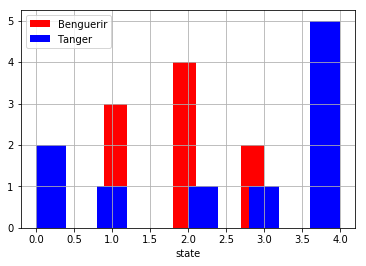

In [23]:
plt.hist(dataframe1['state_to_code'],color='r', label='Benguerir')
#plt.hist(dataframe2['state_to_code'],color='b', label='Tanger')
plt.xlabel("state")
plt.legend()
plt.grid()
plt.show() 